In [17]:
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np

load_dotenv()
TRAIN_SET = os.getenv("TRAIN_PATH")
TEST_SET  = os.getenv("TEST_PATH")

train = pd.read_csv(TRAIN_SET)
test = pd.read_csv(TEST_SET) 

train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Estraggo la target feature: _'sii'_ 

In [18]:
#extact the target variable: sii feature
y_train = train["sii"]
print(y_train, "\n", "=============================================")
print(y_train.shape, "\n", "=============================================")
print(y_train.info())

0       2.0
1       0.0
2       0.0
3       1.0
4       NaN
       ... 
3955    1.0
3956    NaN
3957    1.0
3958    0.0
3959    NaN
Name: sii, Length: 3960, dtype: float64 
(3960,) 
<class 'pandas.core.series.Series'>
RangeIndex: 3960 entries, 0 to 3959
Series name: sii
Non-Null Count  Dtype  
--------------  -----  
2736 non-null   float64
dtypes: float64(1)
memory usage: 31.1 KB
None


Notare che y_target ha il 69% circa di valori non-null (2736/3960) * 100

Rimuovo le feature che presentano l'outcome a NaN

In [19]:
#remove the rows with 'sii' values NaN
train_non_sii_NaN = train.dropna(subset=['sii'])

#remove the 'sii' NaN rows from the target variable 
train_non_sii_NaN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      2736 non-null   object 
 1   Basic_Demos-Enroll_Season               2736 non-null   object 
 2   Basic_Demos-Age                         2736 non-null   int64  
 3   Basic_Demos-Sex                         2736 non-null   int64  
 4   CGAS-Season                             2342 non-null   object 
 5   CGAS-CGAS_Score                         2342 non-null   float64
 6   Physical-Season                         2595 non-null   object 
 7   Physical-BMI                            2527 non-null   float64
 8   Physical-Height                         2530 non-null   float64
 9   Physical-Weight                         2572 non-null   float64
 10  Physical-Waist_Circumference            483 non-null    float64
 

In [20]:
y_train = y_train.dropna()
y_train.info()
y_train.shape

<class 'pandas.core.series.Series'>
Index: 2736 entries, 0 to 3958
Series name: sii
Non-Null Count  Dtype  
--------------  -----  
2736 non-null   float64
dtypes: float64(1)
memory usage: 42.8 KB


(2736,)

**Pulizia dei dati:**
 - Rimuovo le feature non presenti nel test set e stampo percentuali dei valori presenti
 

In [21]:
def intersect_features(tr, ts):
    smaller_train = tr[tr.columns.intersection(ts.columns)]

    # Crea una lista per memorizzare le righe
    rows = []

    # Per ogni feature nelle colonne comuni tra train e test
    for feature in smaller_train.columns:
        # Calcola la percentuale di valori non nulli nel train e nel test
        train_not_null_perc = 100 * smaller_train[feature].notnull().sum() / len(smaller_train)
        test_not_null_perc = 100 * test[feature].notnull().sum() / len(test)
        
        # Aggiungi il risultato alla lista
        rows.append({'feature': feature, 'train': train_not_null_perc, 'test': test_not_null_perc})

    # Converti la lista in un DataFrame
    features = pd.DataFrame(rows)
    features.sort_values('train', ascending=False, inplace=True)

    return smaller_train, features

#intersect_features(train, test)
real_train = intersect_features(train_non_sii_NaN, test)[0]
real_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      2736 non-null   object 
 1   Basic_Demos-Enroll_Season               2736 non-null   object 
 2   Basic_Demos-Age                         2736 non-null   int64  
 3   Basic_Demos-Sex                         2736 non-null   int64  
 4   CGAS-Season                             2342 non-null   object 
 5   CGAS-CGAS_Score                         2342 non-null   float64
 6   Physical-Season                         2595 non-null   object 
 7   Physical-BMI                            2527 non-null   float64
 8   Physical-Height                         2530 non-null   float64
 9   Physical-Weight                         2572 non-null   float64
 10  Physical-Waist_Circumference            483 non-null    float64
 

 - Rimuovo le feature con una certa percentuale di valori NaN. Droppo anche la feature relativa all'id. Ho già droppato la target column

In [22]:
real_train_no_id = real_train.drop(columns=["id"], axis=1)

In [23]:
# Drop the columns with more than a fixed percentage of missing values:
def drop_columns(df, threshold = 0.3): #by default the threshold is 20%. If a column is >= 80% of NaNs, it will be dropped. It can be changed.

    # Calculate the minimum required non-NaN values per column based on the threshold percentage
    minimum_non_NaN = len(df) * threshold   

    # Identify columns to be dropped
    dropped_columns = df.columns[df.isnull().sum() > (len(df) - minimum_non_NaN)].tolist()

    # Drop the identified columns from the DataFrame
    new_df = df.drop(columns=dropped_columns)

    return new_df, dropped_columns

cleaned_train, dropped_columns = drop_columns(real_train_no_id)
cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 52 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Enroll_Season               2736 non-null   object 
 1   Basic_Demos-Age                         2736 non-null   int64  
 2   Basic_Demos-Sex                         2736 non-null   int64  
 3   CGAS-Season                             2342 non-null   object 
 4   CGAS-CGAS_Score                         2342 non-null   float64
 5   Physical-Season                         2595 non-null   object 
 6   Physical-BMI                            2527 non-null   float64
 7   Physical-Height                         2530 non-null   float64
 8   Physical-Weight                         2572 non-null   float64
 9   Physical-Diastolic_BP                   2478 non-null   float64
 10  Physical-HeartRate                      2486 non-null   float64
 

In [24]:
cleaned_train.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,...,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,...,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,75.0,...,39.4497,15.4107,27.0552,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,65.0,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,60.0,...,58.9338,26.4798,45.9966,Winter,2.451,Summer,31.0,45.0,Winter,0.0
5,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,60.0,...,79.6982,35.3804,63.1265,Spring,4.110,Summer,40.0,56.0,Spring,0.0


 - Divido le feature nel mio dataset tra numerical features e cathegorical features. Converto poi le cathegorical tramite 1HE

In [25]:
def extract_numerical_cathegorical(df):
    # Extract numerical and categorical columns
    numerical = df.select_dtypes(include=np.number).columns.tolist()
    categorical = df.select_dtypes(exclude=np.number).columns.tolist()

    return numerical, categorical

numerical_features, categorical_features = extract_numerical_cathegorical(cleaned_train)
print("Numerical features are", len(numerical_features), "; -> ", numerical_features)
print("Cathegorical features are: ", len(categorical_features), "; -> ", categorical_features)

Numerical features are 43 ; ->  ['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_C-PAQ_C_Total', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday']
Cathegorical features are:  9 ; ->  ['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_C-Season', 'SDS-Se

In [26]:
cleaned_train_1he = pd.get_dummies(cleaned_train, columns=categorical_features)
cleaned_train_1he.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 79 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         2736 non-null   int64  
 1   Basic_Demos-Sex                         2736 non-null   int64  
 2   CGAS-CGAS_Score                         2342 non-null   float64
 3   Physical-BMI                            2527 non-null   float64
 4   Physical-Height                         2530 non-null   float64
 5   Physical-Weight                         2572 non-null   float64
 6   Physical-Diastolic_BP                   2478 non-null   float64
 7   Physical-HeartRate                      2486 non-null   float64
 8   Physical-Systolic_BP                    2478 non-null   float64
 9   FGC-FGC_CU                              1919 non-null   float64
 10  FGC-FGC_CU_Zone                         1884 non-null   float64
 

In [27]:
cleaned_train_1he.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,...,PAQ_C-Season_Summer,PAQ_C-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
0,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,0.0,...,False,False,False,False,False,False,True,False,False,False
1,9,0,NaN,14.035590,48.0,46.0,75.0,70.0,122.0,3.0,...,False,False,True,False,False,False,False,False,True,False
2,10,1,71.0,16.648696,56.5,75.6,65.0,94.0,117.0,20.0,...,True,False,True,False,False,False,False,False,True,False
3,9,0,71.0,18.292347,56.0,81.6,60.0,97.0,117.0,18.0,...,False,True,False,False,True,False,False,False,False,True
5,13,1,50.0,22.279952,59.5,112.2,60.0,73.0,102.0,12.0,...,False,False,False,False,True,False,False,True,False,False


Ci sono 39 features numeriche e 36 features categoriche codificate tramite 1HE. Le 1HE sono sottoforma di true/false. Le rendo features numeriche:
 - false -> 0
 - true  -> 1

Così da mantenerle colonne sparse.
Successivamente converto tutte le colonne con lo stesso tipo numerico in _float64_

In [28]:
cleaned_train_1he *= 1
cleaned_train_1he = cleaned_train_1he.astype('float64')
cleaned_train_1he.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 79 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         2736 non-null   float64
 1   Basic_Demos-Sex                         2736 non-null   float64
 2   CGAS-CGAS_Score                         2342 non-null   float64
 3   Physical-BMI                            2527 non-null   float64
 4   Physical-Height                         2530 non-null   float64
 5   Physical-Weight                         2572 non-null   float64
 6   Physical-Diastolic_BP                   2478 non-null   float64
 7   Physical-HeartRate                      2486 non-null   float64
 8   Physical-Systolic_BP                    2478 non-null   float64
 9   FGC-FGC_CU                              1919 non-null   float64
 10  FGC-FGC_CU_Zone                         1884 non-null   float64
 

 - Tramite bootstrap sampling sostituisco i valori NaN con valori stimati

In [29]:
cleaned_train_1he = cleaned_train_1he.fillna(cleaned_train_1he.mean())
cleaned_train_1he.info()    

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 79 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         2736 non-null   float64
 1   Basic_Demos-Sex                         2736 non-null   float64
 2   CGAS-CGAS_Score                         2736 non-null   float64
 3   Physical-BMI                            2736 non-null   float64
 4   Physical-Height                         2736 non-null   float64
 5   Physical-Weight                         2736 non-null   float64
 6   Physical-Diastolic_BP                   2736 non-null   float64
 7   Physical-HeartRate                      2736 non-null   float64
 8   Physical-Systolic_BP                    2736 non-null   float64
 9   FGC-FGC_CU                              2736 non-null   float64
 10  FGC-FGC_CU_Zone                         2736 non-null   float64
 

Equivalentemente stimo i valori per la variabile target:

In [30]:
y_train = y_train.fillna(y_train.mean())
y_train.info()

<class 'pandas.core.series.Series'>
Index: 2736 entries, 0 to 3958
Series name: sii
Non-Null Count  Dtype  
--------------  -----  
2736 non-null   float64
dtypes: float64(1)
memory usage: 42.8 KB


**Model training:**

In [31]:
from sklearn.model_selection import train_test_split


#split the train set into train and validation sets (80% train, 20% validation)
X_train80, x_val20, Y_train80, y_val20 = train_test_split(train, y_train, test_size=0.2, random_state=42)

X_train80.head()

ValueError: Found input variables with inconsistent numbers of samples: [3960, 2736]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train80, Y_train80)

train_acc = accuracy_score(y_true = Y_train80, y_pred = model.predict(X_train80))
val_acc = accuracy_score(y_true = y_val20, y_pred = model.predict(x_val20))
print("Accuracy: %.2f%%".format(train_acc))
print("Accuracy: %.2f%%".format(val_acc))

ValueError: could not convert string to float: '14568d61'

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score  

model = RandomForestRegressor(n_estimators=100)
model.fit(cleaned_train_1he, y_train)

# stampo MSE:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(cleaned_train_1he)
mse = mean_squared_error(y_train, y_pred)
print("MSE: ", mse)

MSE:  0.06670595760233917


Adesso controllo ciascuna delle feature importance allo scopo di droppare le meno utili per la mia classificazione

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

Features sorted by their score: [0.13976545 0.00929721 0.03439411 0.03077023 0.03623351 0.03434114
 0.02946992 0.03753092 0.03713309 0.02420409 0.00335539 0.01350875
 0.00290064 0.01239141 0.00280796 0.01943133 0.00297327 0.01432503
 0.00269046 0.01948162 0.00268653 0.01842366 0.00253251 0.00756631
 0.02105848 0.01076732 0.00398433 0.02035161 0.01274622 0.00442221
 0.01763292 0.01099574 0.01013479 0.00394835 0.01118688 0.01793094
 0.00714858 0.01389347 0.00616852 0.03703323 0.05436467 0.04454052
 0.05035318 0.00248304 0.00327269 0.00233978 0.00221916 0.00403035
 0.00380746 0.00410077 0.00304208 0.00268151 0.00246028 0.00303784
 0.00264836 0.00154343 0.00218323 0.00295462 0.00335156 0.00278537
 0.00372886 0.00320676 0.00287649 0.00251069 0.00153559 0.002234
 0.00169516 0.0023775  0.00341328 0.00229801 0.00599289 0.00208172
 0.00305475 0.00297753 0.00354619 0.00277982 0.00296824 0.00220954
 0.00269492]


[Text(0, 0, 'Basic_Demos-Age'),
 Text(1, 0, 'Basic_Demos-Sex'),
 Text(2, 0, 'CGAS-CGAS_Score'),
 Text(3, 0, 'Physical-BMI'),
 Text(4, 0, 'Physical-Height'),
 Text(5, 0, 'Physical-Weight'),
 Text(6, 0, 'Physical-Diastolic_BP'),
 Text(7, 0, 'Physical-HeartRate'),
 Text(8, 0, 'Physical-Systolic_BP'),
 Text(9, 0, 'FGC-FGC_CU'),
 Text(10, 0, 'FGC-FGC_CU_Zone'),
 Text(11, 0, 'FGC-FGC_GSND'),
 Text(12, 0, 'FGC-FGC_GSND_Zone'),
 Text(13, 0, 'FGC-FGC_GSD'),
 Text(14, 0, 'FGC-FGC_GSD_Zone'),
 Text(15, 0, 'FGC-FGC_PU'),
 Text(16, 0, 'FGC-FGC_PU_Zone'),
 Text(17, 0, 'FGC-FGC_SRL'),
 Text(18, 0, 'FGC-FGC_SRL_Zone'),
 Text(19, 0, 'FGC-FGC_SRR'),
 Text(20, 0, 'FGC-FGC_SRR_Zone'),
 Text(21, 0, 'FGC-FGC_TL'),
 Text(22, 0, 'FGC-FGC_TL_Zone'),
 Text(23, 0, 'BIA-BIA_Activity_Level_num'),
 Text(24, 0, 'BIA-BIA_BMC'),
 Text(25, 0, 'BIA-BIA_BMI'),
 Text(26, 0, 'BIA-BIA_BMR'),
 Text(27, 0, 'BIA-BIA_DEE'),
 Text(28, 0, 'BIA-BIA_ECW'),
 Text(29, 0, 'BIA-BIA_FFM'),
 Text(30, 0, 'BIA-BIA_FFMI'),
 Text(31, 0, 'BIA

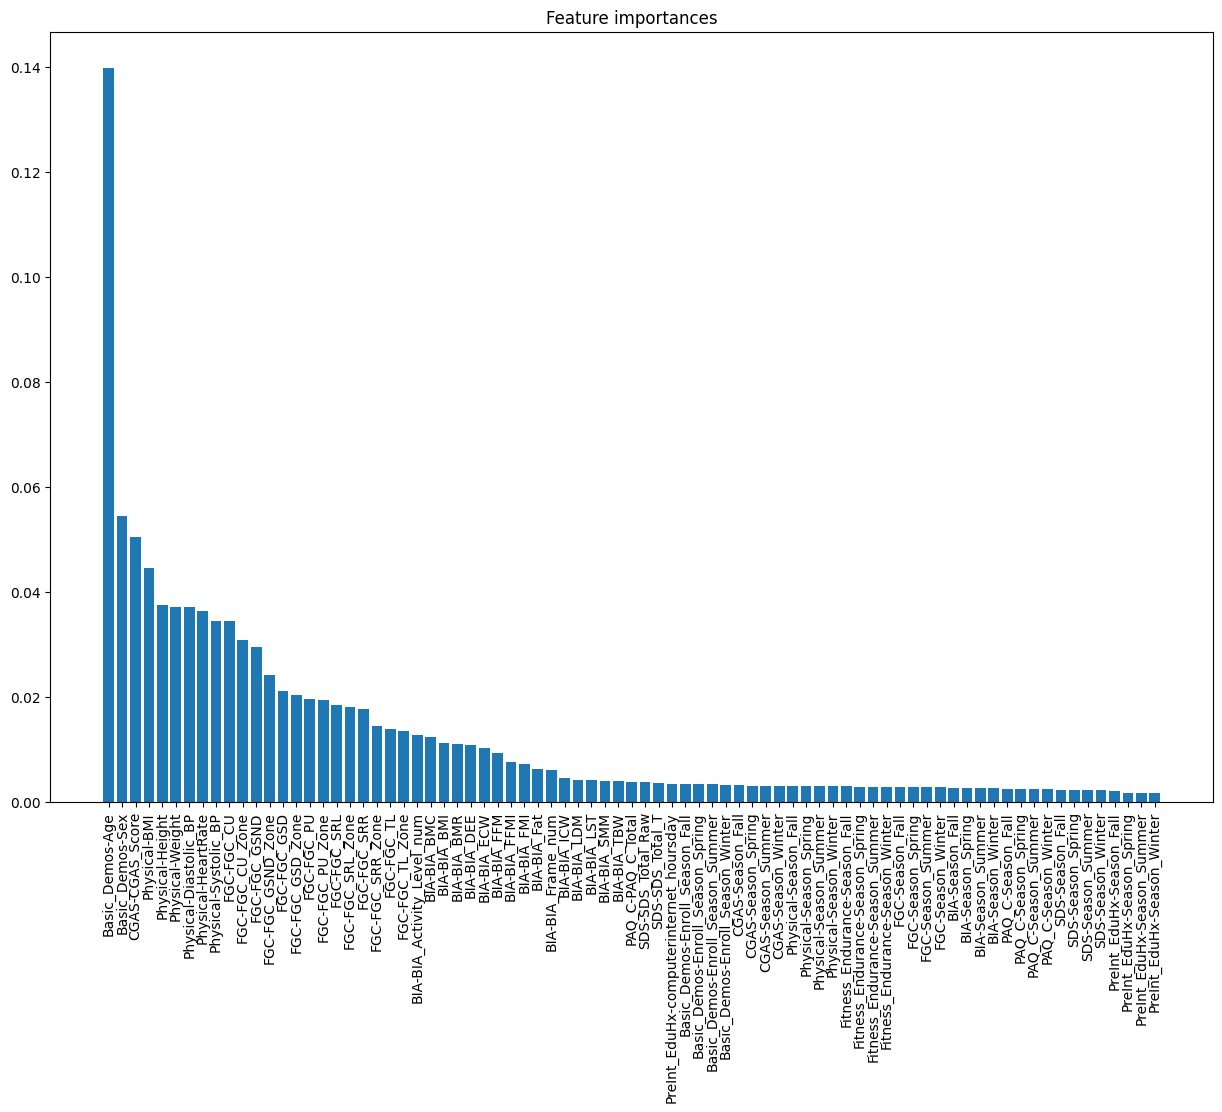

In [ ]:
feature_names = np.array(cleaned_train_1he.columns)
print("Features sorted by their score:", model.feature_importances_)

fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(range(0, cleaned_train_1he.shape[1]), sorted(model.feature_importances_)[::-1])
ax.set_title("Feature importances")
ax.set_xticks(range(cleaned_train_1he.shape[1]))
ax.set_xticklabels(feature_names, rotation=90)

In [ ]:
"""
from sklearn.model_selection import cross_val_score

best_features = np.argsort(model.feature_importances_)[::-1]

rmse = []

for f in range(1,len(best_features)+1):
    rf_small = RandomForestRegressor(n_estimators=100)
    scores = cross_val_score(rf_small,
                             cleaned_train_1he[:,best_features[:f]], y_train,
                             cv=5, scoring='neg_mean_squared_error')
    rmse += [-scores.mean()]

print (f"Full score: {rmse[-1]:.2f}")
print (f"Best score: {min(rmse):.2f}")"""

'\nfrom sklearn.model_selection import cross_val_score\n\nbest_features = np.argsort(model.feature_importances_)[::-1]\n\nrmse = []\n\nfor f in range(1,len(best_features)+1):\n    rf_small = RandomForestRegressor(n_estimators=100)\n    scores = cross_val_score(rf_small,\n                             cleaned_train_1he[:,best_features[:f]], y_train,\n                             cv=5, scoring=\'neg_mean_squared_error\')\n    rmse += [-scores.mean()]\n\nprint (f"Full score: {rmse[-1]:.2f}")\nprint (f"Best score: {min(rmse):.2f}")'

In [ ]:
"""
fig, ax = plt.subplots(figsize=(9,4))
ax.plot(range(1,len(best_features)+1), rmse, 'o-', label="RMSE")
ax.set_title("RMSE on varying features")
ax.set_xlabel("Number of Best features used")
ax.set_ylabel("RMSE")
ax.grid(); """

'\nfig, ax = plt.subplots(figsize=(9,4))\nax.plot(range(1,len(best_features)+1), rmse, \'o-\', label="RMSE")\nax.set_title("RMSE on varying features")\nax.set_xlabel("Number of Best features used")\nax.set_ylabel("RMSE")\nax.grid(); '